In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import emoji
import string 
# Tokenization: split sentences into words, lowercase the words, remove punctuation
import spacy
from spacy.tokenizer import Tokenizer
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from wordcloud import STOPWORDS
import pyLDAvis.gensim_models
import pyLDAvis
import seaborn as sns


stopwords = set(STOPWORDS)
import sys
sys.path.insert(1, "C:\\Users\\ollie\\anaconda3\\Lib\\site-packages\\en_core_web_lg-3.0.0-py3.9.egg")
import en_core_web_lg
nlp = spacy.load('en_core_web_lg') # Load english version of spaCy


plt.style.use('fivethirtyeight')

## Get the data

In [3]:
 # Variables that contain user credentials to access Twitter API

API_Key = "yQYG1NxWXVJzFMGzYLPUAyKCe"
API_Key_Secret = "epUQTwaCkIkKENvJw5LpcgPk8cuS54tqHQCrlGiA3mzLvrpIgP" 
Access_Token = "1415883671685398530-1FwkU7DMkYfLXyJ1tUGpZoi2te8aKr"
Access_Token_Secret = "QoLDp1nnWT5hiHuUjH118ZaQ9Ja4AWbjhl4uj9Larq5I5"

# # Create the authentification object
# authenticate = tweepy.OAuthHandler(API_Key, API_Key_Secret)

# # Set the access token
# authenticate.set_access_token(Bearer_Token)

# # Create the API object while passing in the auth information
# api = tweepy.API(authenticate, wait_on_rate_limit = True)

authenticate = tweepy.OAuthHandler(API_Key, API_Key_Secret)

authenticate.set_access_token(Access_Token, Access_Token_Secret)

# Create the API object while in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

C:\Users\ollie\anaconda3\lib\site-packages\tweepy\auth.py:120: DeprecationWarning: OAuthHandler is deprecated; use OAuth1UserHandler instead.
  warnings.warn(


In [156]:
import base64
import requests
# returns a bearer_header to attach to requests to the Twitter api v2 enpoints which are 
# not yet supported by tweepy 
def get_bearer_header():
    API_Key = "yQYG1NxWXVJzFMGzYLPUAyKCe"
    API_Key_Secret = "epUQTwaCkIkKENvJw5LpcgPk8cuS54tqHQCrlGiA3mzLvrpIgP" 
    Access_Token = "1415883671685398530-1FwkU7DMkYfLXyJ1tUGpZoi2te8aKr"
    Access_Token_Secret = "QoLDp1nnWT5hiHuUjH118ZaQ9Ja4AWbjhl4uj9Larq5I5"
    bearer_token = "AAAAAAAAAAAAAAAAAAAAAHrEbQEAAAAAeEN3uxEiSGEnxvCwGhOZCSDj%2Fe0%3DWddtocQJEsg65lAZeVzvn6IW7sZDOBbMKk50CplYpzdVZyjpQl"
    bearer_header = {
       'Accept-Encoding': 'gzip',
       'Authorization': 'Bearer {}'.format(bearer_token),
       'oauth_consumer_key': API_Key
       }
    return bearer_header

def makeTwitterQuery(query, fields, amount):
    uri = 'https://api.twitter.com/2/tweets/search/recent?'
    params = {'query': query,
       'tweet.fields': fields,
        'max_results':str(amount)
        #'tweet.fields':'replies'
       }
    bearer_header = get_bearer_header()
    resp = requests.get(uri, headers=bearer_header, params=params)
    return resp.json()

def getTweets(account_name, amount):
    query = f'from:{account_name}'
    gett = makeTwitterQuery(query, 'text,conversation_id', amount)
    return gett

def getConversation(conversation_id, amount):
    query = f'conversation_id:{conversation_id}'
    gett = makeTwitterQuery(query, 'text,conversation_id',amount)
    return gett

data = getTweets('elonmusk', 50)
print(len(data['data']))
conversations = []
for datum in data['data']:
    conversations.append(getConversation(datum['conversation_id'], 50))

50


In [157]:
print(conversations[3]['data'])

[{'conversation_id': '1519491954588925959', 'id': '1519701553770545152', 'text': '@elonmusk @BBCScienceNews https://t.co/ISK6dCv1L1'}, {'conversation_id': '1519491954588925959', 'id': '1519701355027443712', 'text': '@elonmusk @BBCScienceNews All they fear is you:\n\nhttps://t.co/hDRDVEYtm3'}, {'conversation_id': '1519491954588925959', 'id': '1519700816181010436', 'text': '@elonmusk @BBCScienceNews Did you make levels too? Guess money is all it takes to save columbine.'}, {'conversation_id': '1519491954588925959', 'id': '1519700585364303883', 'text': '@elonmusk @Daniel986_gmail @BBCScienceNews GOD WON ALREADY! Ready for 5D'}, {'conversation_id': '1519491954588925959', 'id': '1519700447531266053', 'text': '@elonmusk @BBCScienceNews 🏎️🏎️🚗📯🚜🚨🚨'}, {'conversation_id': '1519491954588925959', 'id': '1519700185940561921', 'text': "@elonmusk @BBCScienceNews This shit is how I know you don't take Climate Change seriously and are a charlatan."}, {'conversation_id': '1519491954588925959', 'id': '15

In [158]:
df3 = pd.DataFrame()
for tweet in data['data']:
    df2 = {'text': tweet['text'], 'conversation_id': tweet['conversation_id'], 'fromOriginalAuthor': 1}
    df3 = df3.append(df2, ignore_index = True)

for conversation in conversations:
    if 'data' in conversation:
        for tweet in conversation['data']:
            df2 = {'text': tweet['text'], 'conversation_id': tweet['conversation_id'], 'fromOriginalAuthor': 0}

            df3 = df3.append(df2, ignore_index = True)
# for tweet in conversations[0]:
#     print(tweet)

In [159]:
aggregation_functions = {'text': 'sum', }
df_new = df3.groupby(df3['conversation_id']).aggregate(aggregation_functions)
df = df_new
df

,text
conversation_id,
1515030063364055043,@TechEmails The Instagram curse: \n\nWater eve...
1517142353269899264,@PPathole @Tesla @SpaceX @neuralink @boringcom...
1518468016865878016,@PPathole @WholeMarsBlog The San Francisco off...
1518614732839735304,And be my love in the rain@dogkingson @elonmus...
1518620915793289216,RT @boringcompany: Hyperloop testing at full-s...
1518623997054918657,I hope that even my worst critics remain on Tw...
1518677066325053441,🚀💫♥️ Yesss!!! ♥️💫🚀 https://t.co/0T9HzUHuh6@Kun...
1518915694024400897,@dogeofficialceo Can someone please give the N...
1518988544458428417,@levie 🤩@pootywitdabooty @IlanWesterhof @Xmada...


## <span style="background-color: #FFFF00">Please don't click on cell above unless absolutely necessary - it will run for 30 minutes at least!</span>

### Creating dynamic object

## Deleting emojis, etc. (for the retweets to the first tweet)

In [160]:
# Create a function to clean the tweets
def deleteSpecialSymbols(text):
    # Substitute certain patterns in the tweets
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
    text = re.sub(r'#', '', text) #Removing the # symbol
    text = re.sub(r'RT[\s]+', '', text) #Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) #Will remove the hyperlinks
    
    return text

def give_emoji_free_text(text):
    """
    Removes emoji's from tweets
    Accepts:
        Text (tweets)
    Returns:
        Text (emoji free tweets)
    """
    emoji_list = [c for c in text if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

def url_free_text(text):
    '''
    Cleans text from urls
    '''
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    return text

def getCleanText(text):
    text = deleteSpecialSymbols(text)
    text = give_emoji_free_text(text)
    text = url_free_text(text)
    return text

# Cleaning the text of tweets
df['cleanedText'] = df['text'].apply(getCleanText)

### Get the subjectivity data

In [161]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['cleanedText'].apply(getSubjectivity)
df['Polarity'] = df['cleanedText'].apply(getPolarity)

### Tokenization

In [162]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)


# Custom stopwords
custom_stopwords = ['hi','\n','\n\n', '&amp;', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'like', '$', '@']

# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)

# ALL_STOP_WORDS = spacy + gensim + wordcloud
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)



def tokenize(dfColumn):
    tokens = []

#     tokens = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
#     #tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
#     tokens = re.sub('@*!*\$*', '', tokens) # Remove @ ! $
#     tokens = tokens.strip(',') # TESTING THIS LINE
#     tokens = tokens.strip('?') # TESTING THIS LINE
#     tokens = tokens.strip('!') # TESTING THIS LINE
#     tokens = tokens.strip("'") # TESTING THIS LINE
#     tokens = tokens.strip(".") # TESTING THIS LINE
    if isinstance(dfColumn, str):
        doc_tokens = []
        tokens = tokenizer(dfColumn) 
        for token in tokens:
            if token.text.lower() not in STOP_WORDS:
                doc_tokens.append(token.text.lower())   
        return (doc_tokens)
    else:
        for doc in tokenizer.pipe(dfColumn, batch_size=500):
            doc_tokens = []    
            for token in doc: 
                if token.text.lower() not in STOP_WORDS:
                    doc_tokens.append(token.text.lower())   
            tokens.append(doc_tokens)
        return tokens

#Tokenize the tweets
df['tokens'] = tokenize(df['cleanedText'])

### Lemmatization
Convert "Studying" into "Study", "Meeting" into "meet", "better" and "best" into "good"

In [163]:
# Make tokens a string again
df['tokens_back_to_text'] = [' '.join(map(str, l)) for l in df['tokens']]


def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

df['lemmas'] = df['tokens_back_to_text'].apply(get_lemmas)

In [164]:
# Make lemmas a string again
df['lemmas_back_to_text'] = [' '.join(map(str, l)) for l in df['lemmas']]

# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    # Removing url's
    pattern = r"http\S+"
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
    text = re.sub(r'#', '', text) #Removing the # symbol
    text = re.sub(r'rt[\s]+', '', text) #Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) #Will remove the hyperlinks
    
    tokens = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    #tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
    tokens = re.sub('@*!*\$*', '', tokens) # Remove @ ! $
    tokens = tokens.strip(',') # TESTING THIS LINE
    tokens = tokens.strip('?') # TESTING THIS LINE
    tokens = tokens.strip('!') # TESTING THIS LINE
    tokens = tokens.strip("'") # TESTING THIS LINE
    tokens = tokens.strip(".") # TESTING THIS LINE

    tokens = tokens.lower().split() # Make text lowercase and split it
    
    return tokens

# Apply tokenizer
df['lemma_tokens'] = df['lemmas_back_to_text'].apply(tokenize)

<>:22: DeprecationWarning: invalid escape sequence \$
<>:22: DeprecationWarning: invalid escape sequence \$
C:\Users\ollie\AppData\Local\Temp/ipykernel_1332/3019429472.py:22: DeprecationWarning: invalid escape sequence \$
  tokens = re.sub('@*!*\$*', '', tokens) # Remove @ ! $


In [165]:
df

,text,cleanedText,Subjectivity,Polarity,tokens,tokens_back_to_text,lemmas,lemmas_back_to_text,lemma_tokens
conversation_id,,,,,,,,,
1515030063364055043,@TechEmails The Instagram curse: \n\nWater eve...,"The Instagram curse: Water everywhere, yet alw...",0.622482,0.198476,"[instagram, curse:, water, everywhere,, thirst...","instagram curse: water everywhere, thirsty. in...","[instagram, curse, water, thirsty, instagram, ...",instagram curse water thirsty instagram miss a...,"[instagram, curse, water, thirsty, instagram, ..."
1517142353269899264,@PPathole @Tesla @SpaceX @neuralink @boringcom...,I do love humanity You have a weird concept of...,0.530487,0.180197,"[love, humanity, weird, concept, hurt, feeling...",love humanity weird concept hurt feelings. lov...,"[love, humanity, weird, concept, hurt, feeling...",love humanity weird concept hurt feeling love ...,"[love, humanity, weird, concept, hufeeling, lo..."
1518468016865878016,@PPathole @WholeMarsBlog The San Francisco off...,The San Francisco office of the SEC were shame...,0.543607,0.111056,"[san, francisco, office, sec, shameless, puppe...",san francisco office sec shameless puppets wal...,"[san, francisco, office, sec, shameless, puppe...",san francisco office sec shameless puppet wall...,"[san, francisco, office, sec, shameless, puppe..."
1518614732839735304,And be my love in the rain@dogkingson @elonmus...,And be my love in the rain 加油呀，狗儿子一定要起来 I Have...,0.472888,0.126768,"[love, rain, 加油呀，狗儿子一定要起来, dreams, sell!do, bu...",love rain 加油呀，狗儿子一定要起来 dreams sell!do buy drea...,"[love, rain, 加油呀，狗儿子一定要起来, dream, sell!do, buy...",love rain 加油呀，狗儿子一定要起来 dream sell!do buy dream...,"[love, rain, 加油呀，狗儿子一定要起来, dream, selldo, buy,..."
1518620915793289216,RT @boringcompany: Hyperloop testing at full-s...,: Hyperloop testing at full-scale begins later...,0.000000,0.000000,"[:, hyperloop, testing, full-scale, begins, la...",: hyperloop testing full-scale begins later year.,"[hyperloop, testing, scale, begin, later, year]",hyperloop testing scale begin later year,"[hyperloop, testing, scale, begin, later, year]"
1518623997054918657,I hope that even my worst critics remain on Tw...,I hope that even my worst critics remain on Tw...,0.536896,0.153910,"[hope, worst, critics, remain, twitter,, free,...","hope worst critics remain twitter, free speech...","[hope, bad, critic, remain, twitter, free, spe...",hope bad critic remain twitter free speech mea...,"[hope, bad, critic, remain, twitter, free, spe..."
1518677066325053441,🚀💫♥️ Yesss!!! ♥️💫🚀 https://t.co/0T9HzUHuh6@Kun...,🚀💫♥️ Yesss!!! ♥️💫🚀 Tu nahi hai na to tu kyu re...,0.497671,0.126024,"[🚀💫♥️, yesss!!!, ♥️💫🚀, tu, nahi, hai, na, tu, ...",🚀💫♥️ yesss!!! ♥️💫🚀 tu nahi hai na tu kyu react...,"[🚀, 💫, ♥, ️, yesss, ♥, ️, 💫, 🚀, tu, nahi, hai,...",🚀 💫 ♥ ️ yesss ♥ ️ 💫 🚀 tu nahi hai na tu kyu re...,"[🚀, 💫, ♥, ️, yesss, ♥, ️, 💫, 🚀, tu, nahi, hai,..."
1518915694024400897,@dogeofficialceo Can someone please give the N...,Can someone please give the NPCs a bigger dial...,0.660909,0.045963,"[npcs, bigger, dialogue, tree!?_lord, you're, ...","npcs bigger dialogue tree!?_lord you're ""debat...","[npc, big, dialogue, tree!?_lord, debate, lord...",npc big dialogue tree!?_lord debate lord 😂 bel...,"[npc, big, dialogue, treelord, debate, lord, 😂..."
1518988544458428417,@levie 🤩@pootywitdabooty @IlanWesterhof @Xmada...,"🤩 Dunno, that's what people use to say to othe...",0.536243,0.222401,"[🤩, dunno,, that's, people, use, complained, c...","🤩 dunno, that's people use complained censorsh...","[🤩, dunno, people, use, complain, censorship, ...",🤩 dunno people use complain censorship 😃 😄 😁 🤣...,"[🤩, dunno, people, use, complain, censorship, ..."


### Topic Modeling (Linear Discriminant Analysis)

In [166]:
# Create a id2word dictionary
id2word = Dictionary(df['lemma_tokens'])
print((id2word))


# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))


# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in df['lemma_tokens']]


# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, workers=12, passes=5)


# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]


# Create Topics
topics = [' '.join(t[0:10]) for t in words]


# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

Dictionary(4155 unique tokens: ['account', 'add', 'ah', 'ahead', 'ahhh']...)
1441
------ Topic 0 ------
🔥 🚀 elon humanity people 💥 love buy care way

------ Topic 1 ------
buy 😂 elon twitter 🎉 🤣 people ️ think e

------ Topic 2 ------
twitter free social buy world truth people 😂 speech think

------ Topic 3 ------
👇 😂 need man right woman buy free think know

------ Topic 4 ------
people 😂 twitter speech right think 🤣 free elon know



In [167]:
df

,text,cleanedText,Subjectivity,Polarity,tokens,tokens_back_to_text,lemmas,lemmas_back_to_text,lemma_tokens
conversation_id,,,,,,,,,
1515030063364055043,@TechEmails The Instagram curse: \n\nWater eve...,"The Instagram curse: Water everywhere, yet alw...",0.622482,0.198476,"[instagram, curse:, water, everywhere,, thirst...","instagram curse: water everywhere, thirsty. in...","[instagram, curse, water, thirsty, instagram, ...",instagram curse water thirsty instagram miss a...,"[instagram, curse, water, thirsty, instagram, ..."
1517142353269899264,@PPathole @Tesla @SpaceX @neuralink @boringcom...,I do love humanity You have a weird concept of...,0.530487,0.180197,"[love, humanity, weird, concept, hurt, feeling...",love humanity weird concept hurt feelings. lov...,"[love, humanity, weird, concept, hurt, feeling...",love humanity weird concept hurt feeling love ...,"[love, humanity, weird, concept, hufeeling, lo..."
1518468016865878016,@PPathole @WholeMarsBlog The San Francisco off...,The San Francisco office of the SEC were shame...,0.543607,0.111056,"[san, francisco, office, sec, shameless, puppe...",san francisco office sec shameless puppets wal...,"[san, francisco, office, sec, shameless, puppe...",san francisco office sec shameless puppet wall...,"[san, francisco, office, sec, shameless, puppe..."
1518614732839735304,And be my love in the rain@dogkingson @elonmus...,And be my love in the rain 加油呀，狗儿子一定要起来 I Have...,0.472888,0.126768,"[love, rain, 加油呀，狗儿子一定要起来, dreams, sell!do, bu...",love rain 加油呀，狗儿子一定要起来 dreams sell!do buy drea...,"[love, rain, 加油呀，狗儿子一定要起来, dream, sell!do, buy...",love rain 加油呀，狗儿子一定要起来 dream sell!do buy dream...,"[love, rain, 加油呀，狗儿子一定要起来, dream, selldo, buy,..."
1518620915793289216,RT @boringcompany: Hyperloop testing at full-s...,: Hyperloop testing at full-scale begins later...,0.000000,0.000000,"[:, hyperloop, testing, full-scale, begins, la...",: hyperloop testing full-scale begins later year.,"[hyperloop, testing, scale, begin, later, year]",hyperloop testing scale begin later year,"[hyperloop, testing, scale, begin, later, year]"
1518623997054918657,I hope that even my worst critics remain on Tw...,I hope that even my worst critics remain on Tw...,0.536896,0.153910,"[hope, worst, critics, remain, twitter,, free,...","hope worst critics remain twitter, free speech...","[hope, bad, critic, remain, twitter, free, spe...",hope bad critic remain twitter free speech mea...,"[hope, bad, critic, remain, twitter, free, spe..."
1518677066325053441,🚀💫♥️ Yesss!!! ♥️💫🚀 https://t.co/0T9HzUHuh6@Kun...,🚀💫♥️ Yesss!!! ♥️💫🚀 Tu nahi hai na to tu kyu re...,0.497671,0.126024,"[🚀💫♥️, yesss!!!, ♥️💫🚀, tu, nahi, hai, na, tu, ...",🚀💫♥️ yesss!!! ♥️💫🚀 tu nahi hai na tu kyu react...,"[🚀, 💫, ♥, ️, yesss, ♥, ️, 💫, 🚀, tu, nahi, hai,...",🚀 💫 ♥ ️ yesss ♥ ️ 💫 🚀 tu nahi hai na tu kyu re...,"[🚀, 💫, ♥, ️, yesss, ♥, ️, 💫, 🚀, tu, nahi, hai,..."
1518915694024400897,@dogeofficialceo Can someone please give the N...,Can someone please give the NPCs a bigger dial...,0.660909,0.045963,"[npcs, bigger, dialogue, tree!?_lord, you're, ...","npcs bigger dialogue tree!?_lord you're ""debat...","[npc, big, dialogue, tree!?_lord, debate, lord...",npc big dialogue tree!?_lord debate lord 😂 bel...,"[npc, big, dialogue, treelord, debate, lord, 😂..."
1518988544458428417,@levie 🤩@pootywitdabooty @IlanWesterhof @Xmada...,"🤩 Dunno, that's what people use to say to othe...",0.536243,0.222401,"[🤩, dunno,, that's, people, use, complained, c...","🤩 dunno, that's people use complained censorsh...","[🤩, dunno, people, use, complain, censorship, ...",🤩 dunno people use complain censorship 😃 😄 😁 🤣...,"[🤩, dunno, people, use, complain, censorship, ..."


In [168]:
# Create a id2word dictionary
id2word = Dictionary(df['lemma_tokens'])
print((id2word))

# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))

# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in df['lemma_tokens']]

# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, workers=12, passes=5)

# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

# Create Topics
topics = [' '.join(t[0:10]) for t in words]

# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

Dictionary(4155 unique tokens: ['account', 'add', 'ah', 'ahead', 'ahhh']...)
1441
------ Topic 0 ------
twitter 👉 buy musk elon need truth visiit giift fan

------ Topic 1 ------
speech free people right social truth say 😂 world 🤣

------ Topic 2 ------
😂 🤣 twitter elon people think know buy free man

------ Topic 3 ------
😂 buy people elon twitter ️ 🎉 right 🔥 think

------ Topic 4 ------
twitter people think right buy follower say know trump money



### Computing Perplexity

In [169]:
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity)

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts = df['lemma_tokens'], dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)


Perplexity:  -6.8663943041900755

Coherence Score:  0.2430014730309753


In [170]:
#Creating Topic Distance Visualization
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(base_model, corpus, id2word)

C:\Users\ollie\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.022499  0.025157       1        1  27.451370
1      0.142077  0.011692       2        1  24.218913
3     -0.054162  0.072827       3        1  23.470917
4     -0.025822 -0.108417       4        1  15.990843
0     -0.039594 -0.001259       5        1   8.867958, topic_info=       Term       Freq       Total Category  logprob  loglift
489   truth  56.000000   56.000000  Default  30.0000  30.0000
809       🎉  26.000000   26.000000  Default  29.0000  29.0000
500       👉  15.000000   15.000000  Default  28.0000  28.0000
479  social  48.000000   48.000000  Default  27.0000  27.0000
42      fan  15.000000   15.000000  Default  26.0000  26.0000
..      ...        ...         ...      ...      ...      ...
247  speech   4.959017  100.546771   Topic5  -5.3558  -0.5867
245   sound   3.954338   22.923057   Topic5  -5.5822   0.6654
380    talk   4.095980   33.221368   Topic5  -5.5470   0.3295
139   world   4.248826   62.155524   Topic5  -5.5104  -0.2603
272       😂   4.478184  164.708311   Topic5  -5.4578  -1.1822

[376 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1402      1  0.848380  1000xgem
1038      4  0.871947        14
511       3  0.851289        80
873       2  0.695807         9
0         1  0.244396   account
...     ...       ...       ...
149       4  0.010448         🤣
149       5  0.010448         🤣
872       3  0.906312         🤩
408       1  0.873861         🤷
408       2  0.124837         🤷

[706 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 5, 1])

In [171]:
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

id = 8
print('\n')
vector = base_model[id2word.doc2bow(df['lemma_tokens'][id])]
print(vector)

------ Topic 0 ------
twitter 👉 buy musk elon need truth visiit giift fan

------ Topic 1 ------
speech free people right social truth say 😂 world 🤣

------ Topic 2 ------
😂 🤣 twitter elon people think know buy free man

------ Topic 3 ------
😂 buy people elon twitter ️ 🎉 right 🔥 think

------ Topic 4 ------
twitter people think right buy follower say know trump money



[(3, 0.99645376)]


In [172]:
df['Classification'] = df['text']
df['Classification_strength'] = df['text']

# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

for row_id in range(0, len(df)):
    vector = base_model[id2word.doc2bow(df['lemma_tokens'][row_id])]
    
    # Get the topic
    max = 0
    index = 0
    i = 0
    # Get the maximum
    for topic in vector:
        if topic[1]>max:
            max = topic[1]
            index = i
        i = i+1
    df['Classification'][row_id] = "Topic "+str(index)
    df['Classification_strength'][row_id] = max

------ Topic 0 ------
twitter 👉 buy musk elon need truth visiit giift fan

------ Topic 1 ------
speech free people right social truth say 😂 world 🤣

------ Topic 2 ------
😂 🤣 twitter elon people think know buy free man

------ Topic 3 ------
😂 buy people elon twitter ️ 🎉 right 🔥 think

------ Topic 4 ------
twitter people think right buy follower say know trump money



C:\Users\ollie\AppData\Local\Temp/ipykernel_1332/2381331424.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Classification'][row_id] = "Topic "+str(index)
C:\Users\ollie\AppData\Local\Temp/ipykernel_1332/2381331424.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Classification_strength'][row_id] = max


In [173]:
df

,text,cleanedText,Subjectivity,Polarity,tokens,tokens_back_to_text,lemmas,lemmas_back_to_text,lemma_tokens,Classification,Classification_strength
conversation_id,,,,,,,,,,,
1515030063364055043,@TechEmails The Instagram curse: \n\nWater eve...,"The Instagram curse: Water everywhere, yet alw...",0.622482,0.198476,"[instagram, curse:, water, everywhere,, thirst...","instagram curse: water everywhere, thirsty. in...","[instagram, curse, water, thirsty, instagram, ...",instagram curse water thirsty instagram miss a...,"[instagram, curse, water, thirsty, instagram, ...",Topic 0,0.996025
1517142353269899264,@PPathole @Tesla @SpaceX @neuralink @boringcom...,I do love humanity You have a weird concept of...,0.530487,0.180197,"[love, humanity, weird, concept, hurt, feeling...",love humanity weird concept hurt feelings. lov...,"[love, humanity, weird, concept, hurt, feeling...",love humanity weird concept hurt feeling love ...,"[love, humanity, weird, concept, hufeeling, lo...",Topic 0,0.997036
1518468016865878016,@PPathole @WholeMarsBlog The San Francisco off...,The San Francisco office of the SEC were shame...,0.543607,0.111056,"[san, francisco, office, sec, shameless, puppe...",san francisco office sec shameless puppets wal...,"[san, francisco, office, sec, shameless, puppe...",san francisco office sec shameless puppet wall...,"[san, francisco, office, sec, shameless, puppe...",Topic 0,0.998537
1518614732839735304,And be my love in the rain@dogkingson @elonmus...,And be my love in the rain 加油呀，狗儿子一定要起来 I Have...,0.472888,0.126768,"[love, rain, 加油呀，狗儿子一定要起来, dreams, sell!do, bu...",love rain 加油呀，狗儿子一定要起来 dreams sell!do buy drea...,"[love, rain, 加油呀，狗儿子一定要起来, dream, sell!do, buy...",love rain 加油呀，狗儿子一定要起来 dream sell!do buy dream...,"[love, rain, 加油呀，狗儿子一定要起来, dream, selldo, buy,...",Topic 1,0.805375
1518620915793289216,RT @boringcompany: Hyperloop testing at full-s...,: Hyperloop testing at full-scale begins later...,0.000000,0.000000,"[:, hyperloop, testing, full-scale, begins, la...",: hyperloop testing full-scale begins later year.,"[hyperloop, testing, scale, begin, later, year]",hyperloop testing scale begin later year,"[hyperloop, testing, scale, begin, later, year]",Topic 2,0.630846
1518623997054918657,I hope that even my worst critics remain on Tw...,I hope that even my worst critics remain on Tw...,0.536896,0.153910,"[hope, worst, critics, remain, twitter,, free,...","hope worst critics remain twitter, free speech...","[hope, bad, critic, remain, twitter, free, spe...",hope bad critic remain twitter free speech mea...,"[hope, bad, critic, remain, twitter, free, spe...",Topic 1,0.946044
1518677066325053441,🚀💫♥️ Yesss!!! ♥️💫🚀 https://t.co/0T9HzUHuh6@Kun...,🚀💫♥️ Yesss!!! ♥️💫🚀 Tu nahi hai na to tu kyu re...,0.497671,0.126024,"[🚀💫♥️, yesss!!!, ♥️💫🚀, tu, nahi, hai, na, tu, ...",🚀💫♥️ yesss!!! ♥️💫🚀 tu nahi hai na tu kyu react...,"[🚀, 💫, ♥, ️, yesss, ♥, ️, 💫, 🚀, tu, nahi, hai,...",🚀 💫 ♥ ️ yesss ♥ ️ 💫 🚀 tu nahi hai na tu kyu re...,"[🚀, 💫, ♥, ️, yesss, ♥, ️, 💫, 🚀, tu, nahi, hai,...",Topic 1,0.544212
1518915694024400897,@dogeofficialceo Can someone please give the N...,Can someone please give the NPCs a bigger dial...,0.660909,0.045963,"[npcs, bigger, dialogue, tree!?_lord, you're, ...","npcs bigger dialogue tree!?_lord you're ""debat...","[npc, big, dialogue, tree!?_lord, debate, lord...",npc big dialogue tree!?_lord debate lord 😂 bel...,"[npc, big, dialogue, treelord, debate, lord, 😂...",Topic 2,0.529953
1518988544458428417,@levie 🤩@pootywitdabooty @IlanWesterhof @Xmada...,"🤩 Dunno, that's what people use to say to othe...",0.536243,0.222401,"[🤩, dunno,, that's, people, use, complained, c...","🤩 dunno, that's people use complained censorsh...","[🤩, dunno, people, use, complain, censorship, ...",🤩 dunno people use complain censorship 😃 😄 😁 🤣...,"[🤩, dunno, people, use, complain, censorship, ...",Topic 0,0.996454


------ Topic 0 ------
twitter 👉 buy musk elon need truth visiit giift fan

------ Topic 1 ------
speech free people right social truth say 😂 world 🤣

------ Topic 2 ------
😂 🤣 twitter elon people think know buy free man

------ Topic 3 ------
😂 buy people elon twitter ️ 🎉 right 🔥 think

------ Topic 4 ------
twitter people think right buy follower say know trump money



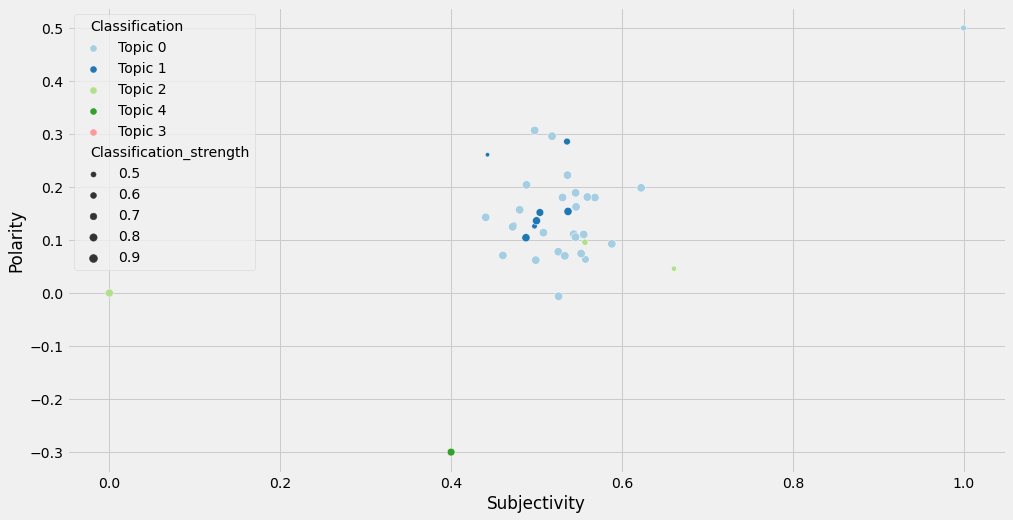

In [175]:
sns.color_palette("Paired")
plt.figure(figsize=(15,8))

ax = sns.scatterplot(x="Subjectivity", y="Polarity", data=df, hue="Classification", size = "Classification_strength", palette="Paired")

# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")